**Reference** : https://github.com/qiskit-community/ibm-quantum-challenge-2024/blob/main/content/lab_3/lab-3-ai-transpiler.ipynb

In [1]:
### Install Qiskit and relevant packages, if needed

%pip install -q qiskit[visualization]==1.0.2
%pip install -q qiskit_ibm_runtime
%pip install -q qiskit_aer
%pip install -q graphviz
%pip install -q git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git
%pip install -q qiskit-transpiler-service

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.9/323.9 kB 23.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 8.0 MB/s eta 0:00:00
  Installing bui

In [10]:
%set_env QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b

env: QXToken=16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b


In [3]:
# qc-grader should be 0.18.10 (or higher)
import qc_grader

qc_grader.__version__

'0.18.10'

In [4]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.library import EfficientSU2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_transpiler_service.transpiler_service import TranspilerService

In [5]:

# Import for grader
from qc_grader.challenges.iqc_2024 import grade_lab3_ait_ex1, grade_lab3_ait_ex2

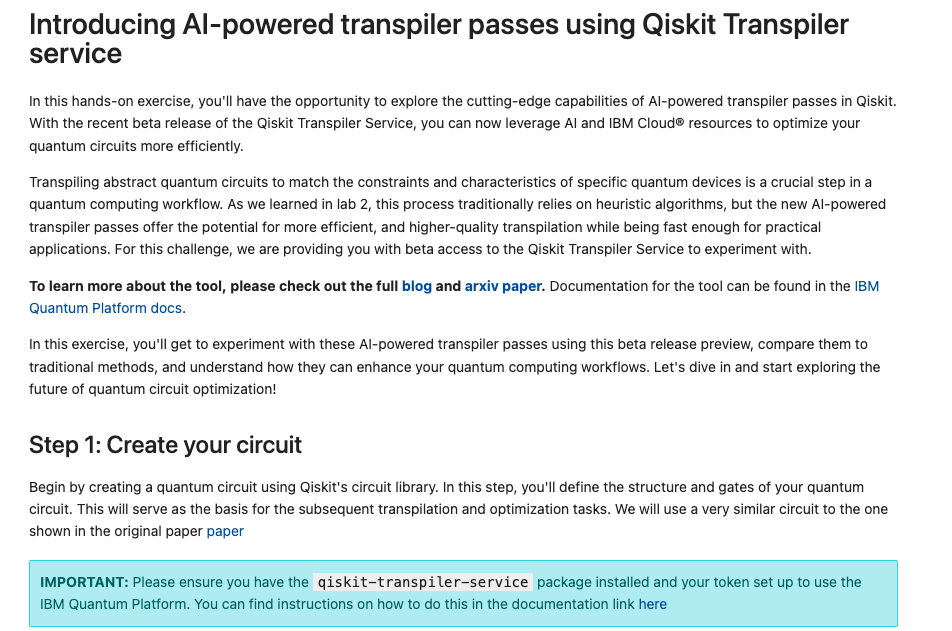

In [6]:
NUM_QUBITS = 61

Original circuit -> Depth: 65, CNOTs: 61


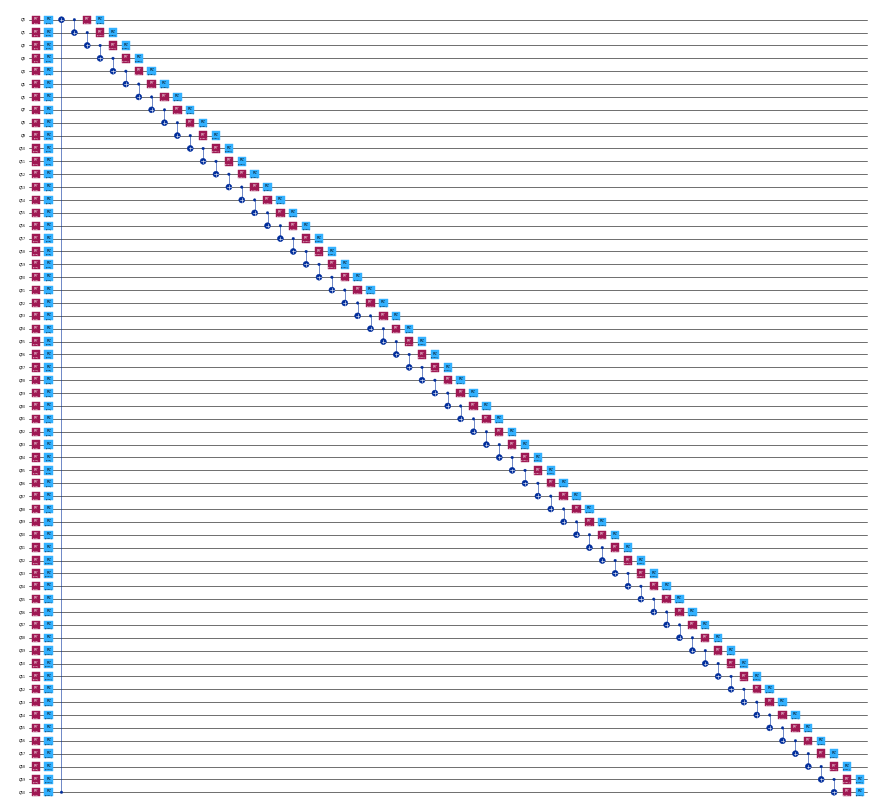

In [7]:
circuit = EfficientSU2(NUM_QUBITS, entanglement="circular", reps=1).decompose()

print(f"Original circuit -> Depth: {circuit.depth()}, CNOTs: {circuit.num_nonlocal_gates()}")
circuit.draw(fold=-1, output="mpl", style="iqp", scale=0.2)

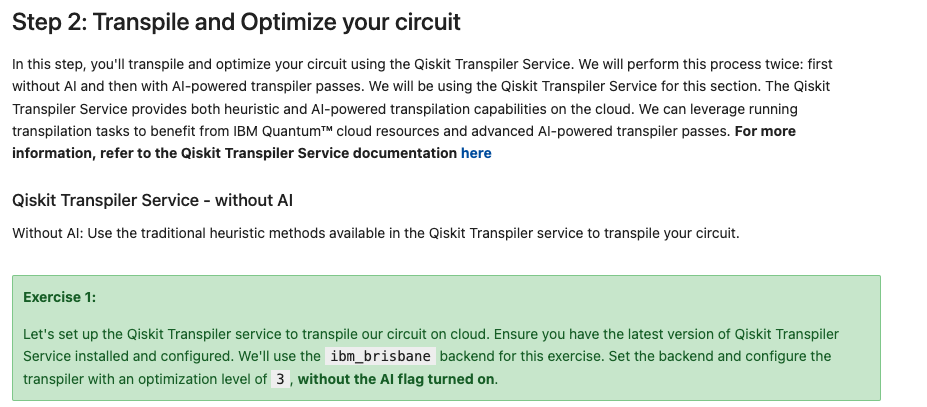

In [12]:
QiskitRuntimeService.save_account(
    channel="ibm_quantum",
    token="16d6dd47657b972c1547b10fb7844fd1a407cc047430da104bd28a29a7394da2ea55115ecfcd09ba4e930ff8372156429ecf693000068b161a776b05b93c191b",
    set_as_default=True,
    overwrite=True,
)

# Load saved credentials
service = QiskitRuntimeService()

In [13]:
transpiler_ai_false = TranspilerService(
    backend_name="ibm_brisbane",
    ai="false",
    optimization_level=3,
)

In [14]:

# Submit your answer using following code

grade_lab3_ait_ex1(transpiler_ai_false) # Expected result type: TranspilerService

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [15]:
circuit_ai_false = transpiler_ai_false.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled without AI -> Depth: 1163, CNOTs: 307


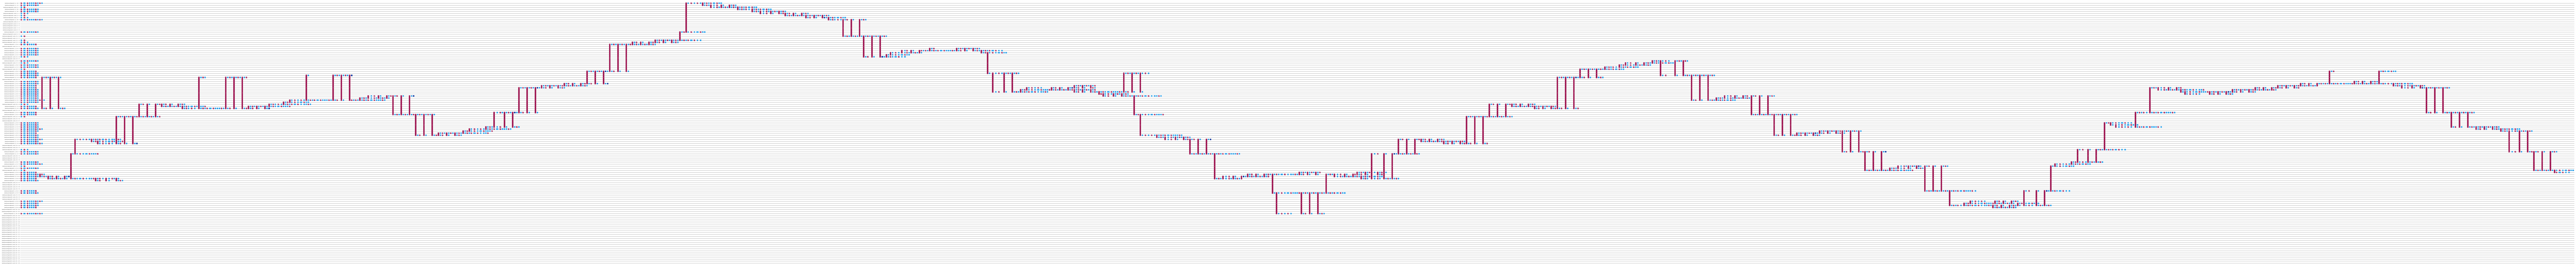

In [16]:
print(f"Transpiled without AI -> Depth: {circuit_ai_false.depth()}, CNOTs: {circuit_ai_false.num_nonlocal_gates()}")
circuit_ai_false.draw(fold=-1, output="mpl", scale=0.2)

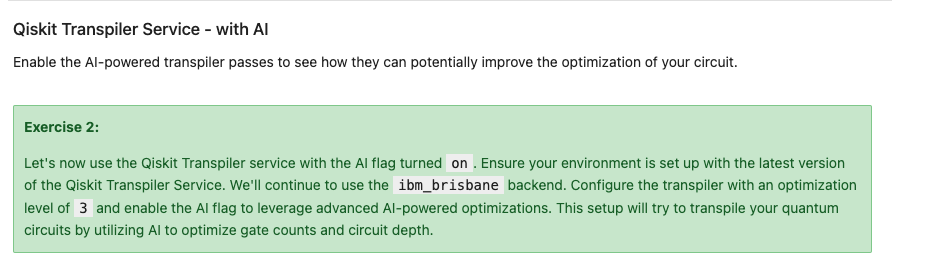

In [17]:
transpiler_ai_true = TranspilerService(
    backend_name="ibm_brisbane",
    ai="true",
    optimization_level=3,
)

In [18]:
# Submit your answer using following code

grade_lab3_ait_ex2(transpiler_ai_true) # Expected result type: TranspilerService

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [19]:
circuit_ai_true = transpiler_ai_true.run(circuit)

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result


Transpiled with AI -> Depth: 276, CNOTs: 64


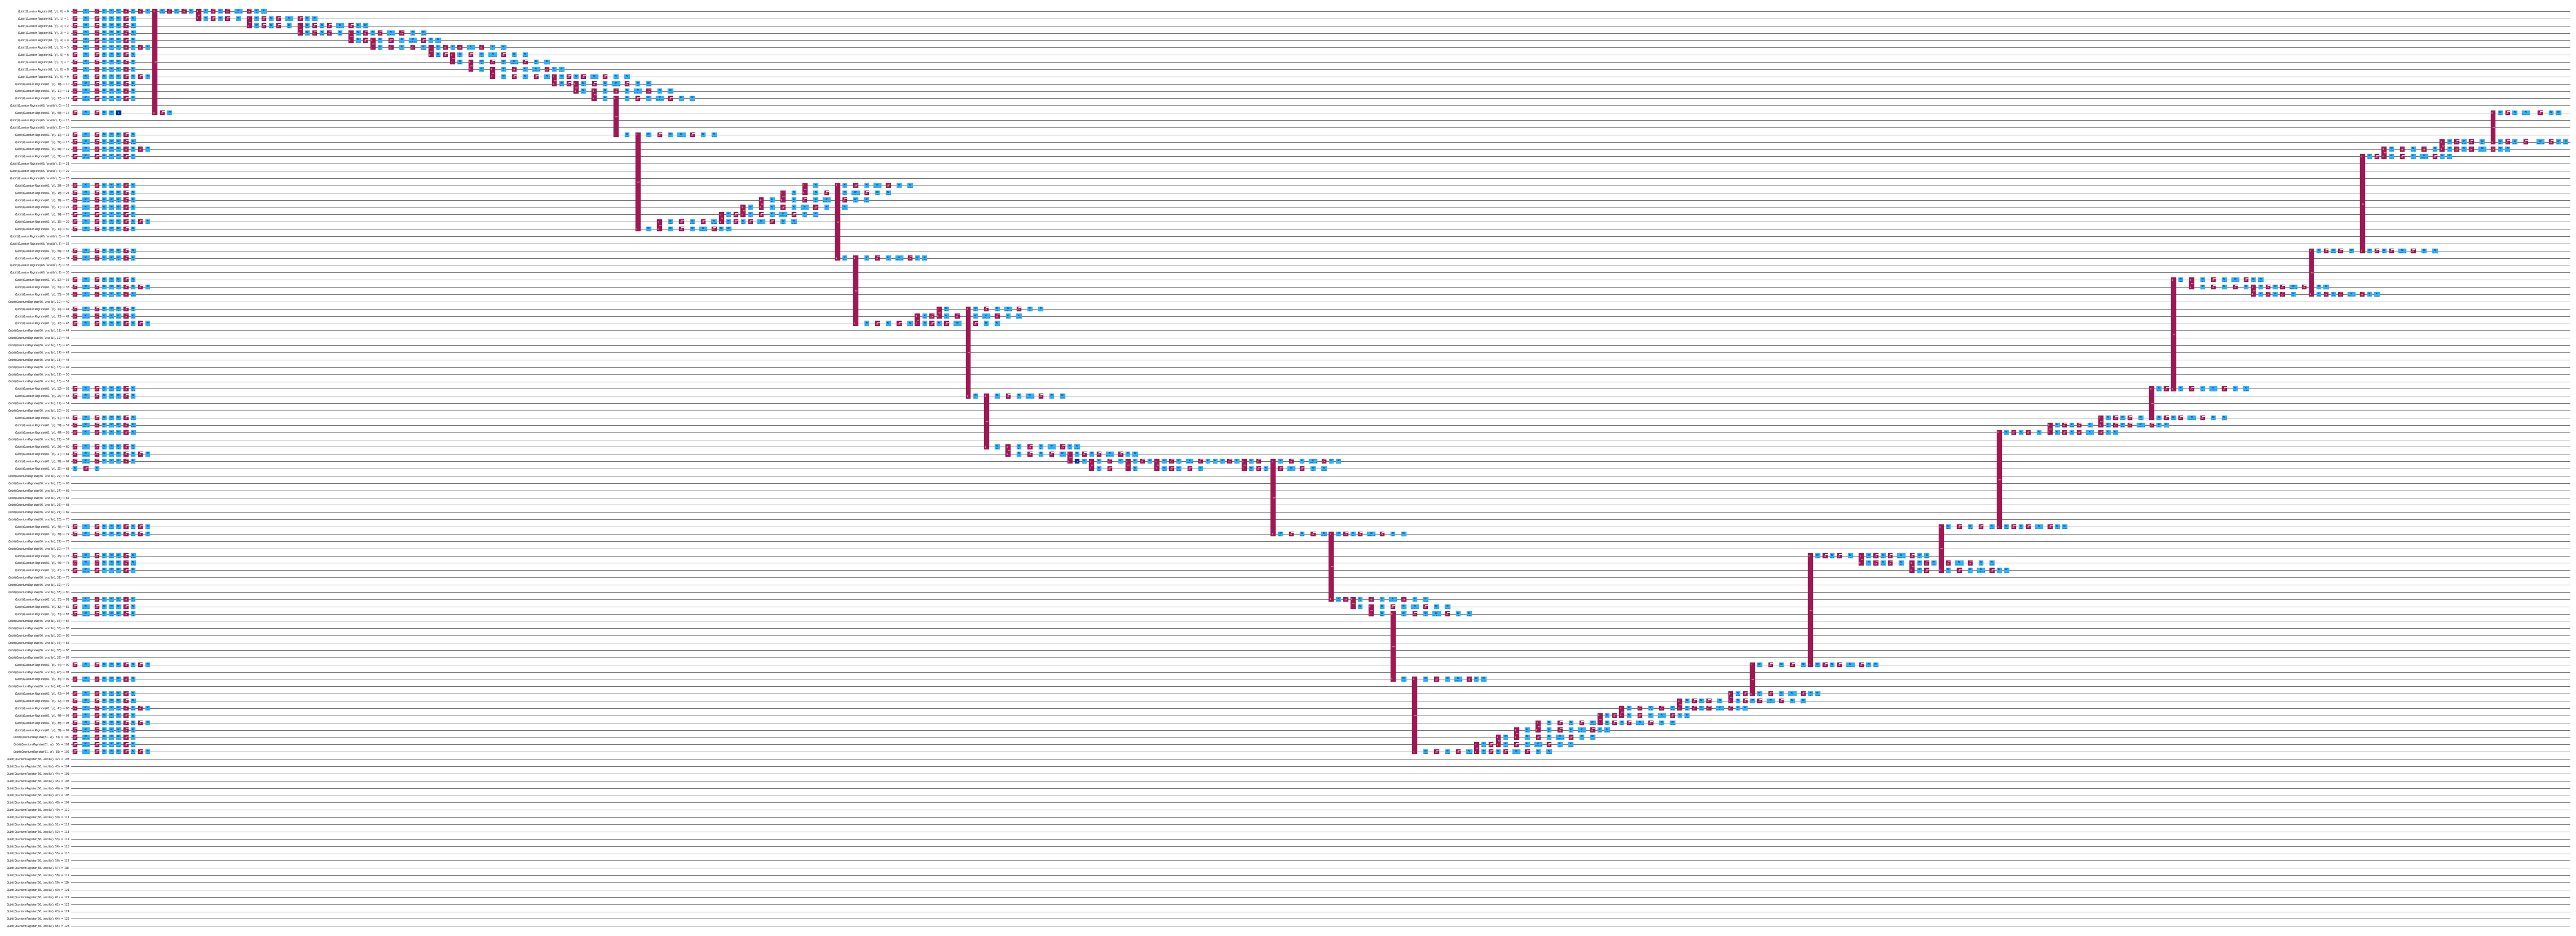

In [20]:
print(f"Transpiled with AI -> Depth: {circuit_ai_true.depth()}, CNOTs: {circuit_ai_true.num_nonlocal_gates()}")
circuit_ai_true.draw(fold=-1, output="mpl", scale=0.2)

### Step 3: Plotting the graph
Visualize the results of your transpilation and optimization efforts. Plot graphs to compare the performance metrics (e.g., depth, gate count) of the circuits transpiled with and without AI. This will help you understand the impact of AI-powered transpiler passes on your quantum circuit.

In [21]:
# Transpiling locally using Qiskit SDK
service = QiskitRuntimeService()
backend = service.backend("ibm_sherbrooke")
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

In [23]:
# Run and compile results
num_qubits = [11, 21, 41, 61, 81]
num_cnots_local = []
num_cnots_with_ai = []
num_cnots_without_ai = []

for nq in num_qubits:
    circuit = EfficientSU2(nq, entanglement="circular", reps=1).decompose()

    # Using the Transpiler locally on Qiskit
    circuit_local = pm.run(circuit)
    # Using the transpiler service without AI
    circuit_without_ai = transpiler_ai_false.run(circuit)
    # Using the transpiler service with AI
    circuit_with_ai = transpiler_ai_true.run(circuit)

    num_cnots_local.append(circuit_local.num_nonlocal_gates())
    num_cnots_without_ai.append(circuit_without_ai.num_nonlocal_gates())
    num_cnots_with_ai.append(circuit_with_ai.num_nonlocal_gates())

INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_transpiler_service.transpiler_service:Qiskit transpiler service returned a result
INFO:qiskit_transpiler_service.transpiler_service:Requesting transpile to the service
INFO:qiskit_tr

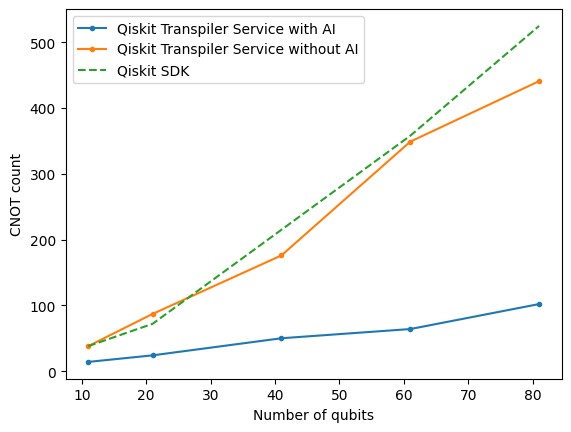

In [24]:
plt.plot(num_qubits, num_cnots_with_ai, '.-')
plt.plot(num_qubits, num_cnots_without_ai, '.-')
plt.plot(num_qubits, num_cnots_local, '--')
plt.xlabel("Number of qubits")
plt.ylabel("CNOT count")
plt.legend(["Qiskit Transpiler Service with AI", "Qiskit Transpiler Service without AI", "Qiskit SDK"])